<a href="https://colab.research.google.com/github/Polliferraz/on34-python-s07-banco-de-dados-I/blob/main/Afetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ON34 Python S07 Banco de dados I - Exercicio de casa

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito após de Bando de dados I.

## Caso pessoal

Pense no seu dia a dia, o que poderia se aproveitar de uma arquitetura de banco de dados para organizar as informações? (e as idéias).



## Desafio 1

Traga um caso de uso que identificou em seu dia a dia. Explique o motivo dos dados precisarem de organização e quais as informações que espera ter uma vez que esses forem organizados.

Resposta esperada: Um texto de no minimo 2 parágrafos com sua necessidade de negócio e ao menos 3 perguntas a serem respondidas pela organização dos dados.



RESPOSTA DESAFIO 1:

Eu sou uma pessoa Não-Monogâmica (NM) e em razão do tipo que trabalho que tinha (embarcava 42 dias e em seguida tinha 42 dias de férias) dispunha de muito tempo para meus afetos (lê-se pela sociedade convencional como: amigues, familiares e relações afetivas-sexuais). No entanto, no momento estou me dedicando a realizar uma transição de carreira, logo disponho de menos tempo, e com isso preciso gerenciar melhor os encontros e momentos de atenção que dedico aos meus entes queridos.

Sendo assim vou organizar a tabela de Afetos e os seus respectivos dados; outra com os tipos de encontros; e o resgistro dos dates em si.

*   Quais os afetos que eu tive mais encontros?
*   Quem eu possivelmente estou negligenciando (menos encontros)? Ainda que não seja necessária equivalência.
*   Qual o tipo de enocntro que mais tenho?

## Desafio 2

Estruture uma arquitetura de ao menos 3 entidades contando com chaves primárias e estrangeiras para solucionar o problema inicial.

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

ESTRUTURA STAR

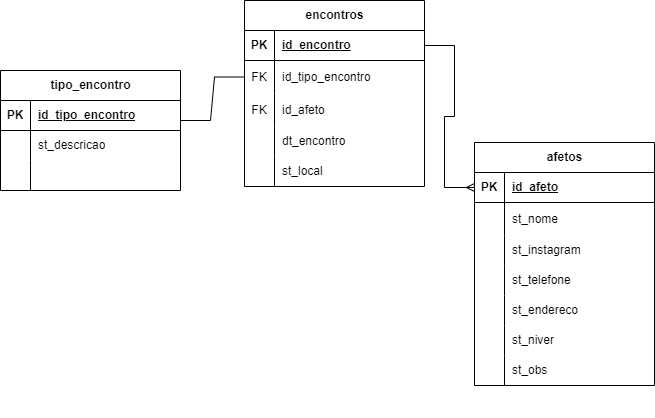

## Desafio 3

Crie toda a estrutura desenhada e popule as tabelas citadas.

Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


### Biblioteca, conexão e cursor

In [ ]:
# Importar a biblioteca
import sqlite3


#Criar um banco de dados e uma conexão com ele:
conn = sqlite3.connect("descolonizando_afetividade.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

### Tabela afetos

In [ ]:
# Criando a tabela de Afetos (sem chave estrangeira)
cur.execute("""
CREATE TABLE afetos(
  id_afeto TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_instagram TEXT NOT NULL,
  st_telefone TEXT NOT NULL,
  st_endereco TEXT NOT NULL,
  dt_niver TEXT NOT NULL,
  st_obs TEXT
)
""")

### Dados da tabela afetos

In [ ]:
#Inserindo dados
cur.execute("""
INSERT INTO afetos (id_afeto, st_nome, st_instagram, st_telefone, st_endereco, dt_niver, st_obs) VALUES
('a1', 'Mãe', '@vell.v', '73 98811 7076', 'Jequié', '1960-04-21', ''),
('a2', 'Marília', '@lilaroots', '73 99113 6532', 'Conquista', '1982-02-18', ''),
('a3', 'Alina', '@alinelop', '73 98816 7076', 'Ilhéus', '1983-11-12', 'Alice'),
('a4', 'Fer', '@fernandinha', '97 99711 1238', 'Rio de Janeiro', '1985-10-08', 'Clever'),
('a5', 'Igor', '@igor', '92 98723 8900', 'Manaus', '1986-09-08', ''),
('a6', 'Paulinho', '@paulovesper', '71 99873 3467', 'Salvador', '1986-12-13', ''),
('a7', 'Rô', '@rsaraceno', '71 99770 6789', 'Salvador', '1981-12-06', ''),
('a8', 'Erick', '@ercikm', '71 98876 0034', 'Pituacives', '1997-07-13', '')
""")

### Commit

In [ ]:
# Comitar as inserções
conn.commit()

### Tabela tipos de encontros

In [ ]:
#Tabela tipos de encontro
cur.execute("""
CREATE TABLE tipos_de_encontro (
    id_tipo_encontro TEXT NOT NULL PRIMARY KEY,
    st_descricao TEXT NOT NULL
)
""")


### Dados da tabela tipos de encontros

In [ ]:
#Inserindo dados para tipos de enocntro
cur.execute("""
INSERT INTO tipos_de_encontro (id_tipo_encontro, st_descricao) VALUES
('t1', 'Aniversário'),
('t2', 'Noite de jogos'),
('t3', 'Almoço de família'),
('t4', 'Noite de Vinho'),
('t5', 'Chamada de vídeo'),
('t6', 'Live')
""")

In [ ]:
# Comitar as inserções
conn.commit()

### Tabela encontros

In [ ]:
#Tabela de encontros (tabela Fato)

cur.execute("""
CREATE TABLE encontros (
    id_encontro TEXT NOT NULL  PRIMARY KEY,
    id_tipo_encontro TEXT NOT NULL,
    id_afeto TEXT NOT NULL,
    dt_encontro TEXT NOT NULL,
    st_local TEXT NOT NULL,
    FOREIGN KEY (id_afeto) REFERENCES afetos(id_afeto),
    FOREIGN KEY (id_tipo_encontro) REFERENCES tipos_de_encontro(id_tipo_encontro)
)
""")


### Dados da tabela encontros

In [ ]:
#Inserir dados do encontro
cur.execute("""
INSERT INTO encontros (id_encontro, id_tipo_encontro, id_afeto, dt_encontro, st_local) VALUES
('e1', 't1', 'a6', '2024-07-07', 'Entre Folhas e Ervas'),
('e2', 't4', 'a7', '2024-08-01', 'Mi casa'),
('e3', 't5', 'a3', '2024-07-16', 'Mi casa'),
('e4', 't2', 'a4', '2024-07-23', 'On line'),
('e5', 't4', 'a7', '2024-07-12', 'Mi casa'),
('e6','t3', 'a1', '2024-06-05', 'Carol Nutri'),
('e7', 't2', 'a6', '2024-07-07', 'On line'),
('e8', 't4', 'a6', '2024-08-01', 'Mi casa'),
('e9', 't5', 'a3', '2024-07-16', 'Mi casa'),
('e10', 't2', 'a4', '2024-07-23', 'Casa Gomex'),
('e11', 't4', 'a7', '2024-07-12', 'Mi casa'),
('e12','t3', 'a1', '2024-06-05', 'Mi casa')
""")

In [ ]:
# Comitar as inserções
conn.commit()

### Fechando conexao

In [ ]:
# Fechando a conexão

conn.close()


## Desafio 4

Se deixe errar e corrigir. Mostre ajustes que teve que fazer depois da estrutura completa.

Resposta esperada: Use o metodo UPDATE, DROP ou ALTER para modificar sua estrutura.


### Biblioteca, conexão e cursor

In [ ]:
# Importar a biblioteca
import sqlite3


#Criar um banco de dados e uma conexão com ele:
conn = sqlite3.connect("descolonizando_afetividade.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

### UPDATE

In [ ]:

# Atualização, correção do instagram do Paulinho
cur.execute("""
UPDATE afetos
SET st_instagram = '@paulovitordos_s'
WHERE st_instagram = '@paulovesper';
""")



In [ ]:
# Comitar as mudanças
conn.commit()

### INSERT

In [ ]:
# Importar novos dados a biblioteca
cur.execute("""
INSERT INTO afetos VALUES
  ('a9','Sara Saraceno','@ssaraceno', '71 99342 8970', 'Salvador', '1981-01-21', ''),
  ('a10', 'Rafa Gomex', '@gomex', '71 98765 4578', 'Salvador', '1986-01-23', '')
""")

#Verificar inserção
res = cur.execute("SELECT * FROM afetos")
res.fetchall()

[('a1', 'Mãe', '@vell.v', '73 98811 7076', 'Jequié', '1960-04-21', ''),
 ('a2',
  'Marília',
  '@lilaroots',
  '73 99113 6532',
  'Conquista',
  '1982-02-18',
  ''),
 ('a3',
  'Alina',
  '@alinelop',
  '73 98816 7076',
  'Ilhéus',
  '1983-11-12',
  'Alice'),
 ('a4',
  'Fer',
  '@fernandinha',
  '97 99711 1238',
  'Rio de Janeiro',
  '1985-10-08',
  'Clever'),
 ('a5', 'Igor', '@igor', '92 98723 8900', 'Manaus', '1986-09-08', ''),
 ('a6',
  'Paulinho',
  '@paulovitordos_s',
  '71 99873 3467',
  'Salvador',
  '1986-12-13',
  ''),
 ('a7', 'Rô', '@rsaraceno', '71 99770 6789', 'Salvador', '1981-12-06', ''),
 ('a8', 'Erick', '@ercikm', '71 98876 0034', 'Pituacives', '1997-07-13', ''),
 ('a9',
  'Sara Saraceno',
  '@ssaraceno',
  '71 99342 8970',
  'Salvador',
  '1981-01-21',
  ''),
 ('a10',
  'Rafa Gomex',
  '@gomex',
  '71 98765 4578',
  'Salvador',
  '1986-01-23',
  '')]

In [ ]:
# Comitar as mudanças
conn.commit()

### ALTER TABLE

In [ ]:
# adicionando coluna
cur.execute("""
ALTER TABLE encontros
ADD COLUMN OBS TEXT;
""")

# Comitar as inserções
cur.execute("""
UPDATE encontros
SET OBS = ' '
""")

res = cur.execute("SELECT * FROM encontros")
res.fetchall()

[('e1', 't1', 'a6', '2024-07-07', 'Entre Folhas e Ervas', ' '),
 ('e2', 't4', 'a7', '2024-08-01', 'Mi casa', ' '),
 ('e3', 't5', 'a3', '2024-07-16', 'Mi casa', ' '),
 ('e4', 't2', 'a4', '2024-07-23', 'On line', ' '),
 ('e5', 't4', 'a7', '2024-07-12', 'Mi casa', ' '),
 ('e6', 't3', 'a1', '2024-06-05', 'Carol Nutri', ' '),
 ('e7', 't2', 'a6', '2024-07-07', 'On line', ' '),
 ('e8', 't4', 'a6', '2024-08-01', 'Mi casa', ' '),
 ('e9', 't5', 'a3', '2024-07-16', 'Mi casa', ' '),
 ('e10', 't2', 'a4', '2024-07-23', 'Casa Gomex', ' '),
 ('e11', 't4', 'a7', '2024-07-12', 'Mi casa', ' '),
 ('e12', 't3', 'a1', '2024-06-05', 'Mi casa', ' ')]

In [ ]:
# Comitar as mudanças
conn.commit()

### Fechando conexão

In [ ]:
# Fechar a conexão com o banco de dados
conn.close()

## Desafio 5

Responda suas dúvidas de negócio com os dados que levantou.

Resposta esperada: Crie consultas para entender melhor seus dados, ao menos 3 consultas relacionadas as dúvidas iniciais.


* Com qual afeto tive mais encontros?
* Onde ocorre a maioria dos encontros?
* Qual o tipo de enocntro que mais ocorre?

Essas foram as questões que consegui responder, e não exatamente, mas apresentando o resumo dos dados. as perguntas que fiz quando idealizei o banco de dados, eu não consegui responder, pois não tinha ferramentas suficientes.

Eu gostaria de ter colocado a tabela do tipo N:N, pois um encontro pode ter vários afetos, assim como os afetos podem ter vários encontros. Mas não consegui.

In [ ]:
import sqlite3

# Conectar ao banco de dados
con = sqlite3.connect('descolonizando_afetividade.db')
cur = con.cursor()



#### Com qual afeto eu me enontrei mais?

In [ ]:
#Com qual afeto eu me enontrei mais?
res = cur.execute("""
SELECT
  id_afeto,
  count(id_afeto)
FROM
  encontros
GROUP BY
  id_afeto
""")
res.fetchall()

[('a1', 2), ('a3', 2), ('a4', 2), ('a6', 3), ('a7', 3)]

#### Onde ocorre a maioria dos encontros?

In [ ]:
#Onde ocorre a maioria dos encontros?
res = cur.execute("""
SELECT
  st_local,
  count(st_Local)
FROM
  encontros
GROUP BY
  st_local
""")
res.fetchall()

[('Carol Nutri', 1),
 ('Casa Gomex', 1),
 ('Entre Folhas e Ervas', 1),
 ('Mi casa', 7),
 ('On line', 2)]

#### Qual tipo de encontro mais se repetiu?

In [ ]:
# Qual tipo de encontro mais se repetiu?
res = cur.execute("""
SELECT
  id_tipo_encontro,
  count(id_tipo_encontro)
FROM
  encontros
GROUP BY
  id_tipo_encontro
""")
res.fetchall()

[('t1', 1), ('t2', 3), ('t3', 2), ('t4', 4), ('t5', 2)]

In [ ]:
# Fechar a conexão com o banco de dados
conn.close()